In [7]:
dict_001 = {'aHC':{'FERJ':["b2-b1","b6-b5"], 'PIRJ':["b'4-b'3"], 'VACJ':["b3-b2"]},
            'OFC_olf':{'LEFC':["o4-o3"], 'SEMC':["o5-o4","o6-o5"], 'PIRJ':["o5-o4"]},
            'IFG':{'FERJ':["o9-o8","o10-o9"], 'SEMC':["j2-j1"], 'VACJ':["k'13-k'12"]},}

dict_01 = {'aHC':{'FERJ':["b2-b1","b6-b5","b3-b2","b'5-b'4"],'PIRJ':["b'4-b'3"],
                  'VACJ':["b3-b2","b'2-b'1"], 'SEMC':["b5-b4"]},
            'IFG': {'FERJ':["o9-o8","o10-o9","o8-o7"], 'SEMC':["j2-j1"],
                    'VACJ':["k'13-k'12"]},
           'OFC_olf':{'LEFC':["o4-o3","o6-o5"], 'SEMC':["o5-o4","o6-o5","o7-o6"],
                      'PIRJ':["o5-o4"]},
           'PirT': {'FERJ':["a3-a2","j2-j1"], 'VACJ':["d'2-d'1"]},}

-> Olfacto loaded
0.5665106664126556 0.942490937377036 0.5556145391268758 -36.39425467497827


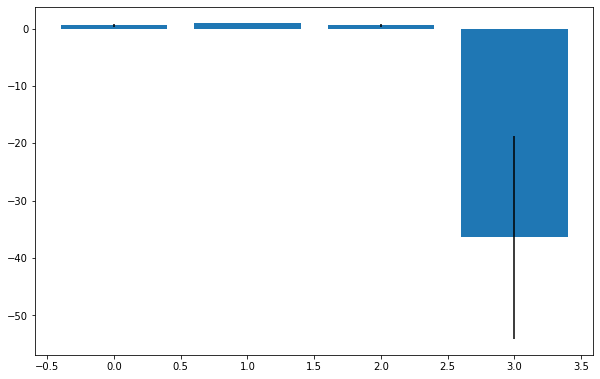

ZeroDivisionError: division by zero

In [24]:
"""
Test correlations with noise
"""
import numpy as np
from scipy.signal import correlate
from brainpipe.system import study
import seaborn as sns
from os.path import join
from itertools import product
import matplotlib.pyplot as plt 

###############################################################################
st = study('Olfacto')
path_tps = join(st.path, 'feature/TPSim_{}_By_Odor_By_Cond/TPS_by_cond/6freqs/')
path_pow = join(st.path, 'feature/TPSim_power_data/Power_all_elecs_E_R_by_cond/')
tps_form = join(path_tps, 'TPS_spear_{}_cond_{}_{}_3s_zFisher.npz')
pow_form = join(path_pow, '{}_odor_{}_{}_6freqs.npz')
###############################################################################

phases = ['Enc_Ret','Enc','Ret']
th = '0.001'
dict_elecs = dict_001 if th == '0.001' else dict_01
freqs = ['delta','theta','alpha','beta','low_gamma','high_gamma']
rois = ['OFC_olf']

for roi in rois:
    freq = 'high_gamma' if roi in ['OFC_olf','IFG'] else 'beta'
    id_freq = [i for i,f in enumerate(freqs) if f==freq]
    tps_E, tps_R, tps_ER, tps_f = [],[],[],[]
    for su in dict_elecs[roi]:
        for chan in dict_elecs[roi][su]:
            
            mat = np.load(tps_form.format('Enc',su,'high',freq),allow_pickle=True)
            idx_chan = [i for i,c in enumerate(mat['channel']) if c == chan][0]
            tps_E.extend([np.mean(mat['tps'][idx_chan])])
            tps_R.extend([np.mean(np.load(tps_form.format('Ret',su,'high',
                                        freq))['tps'][idx_chan])])
            tps_ER.extend([np.mean(np.load(tps_form.format('Enc_Ret',su,
                                        'high',freq))['tps'][idx_chan])])
            
            pow_E = np.squeeze(np.load(pow_form.format(su,'high',
                                    'E'))['xpow'][id_freq,idx_chan,17:47,:])
            npts, ntr = (pow_E).shape
            pow_fake = np.zeros([npts,ntr])
            #pow_fake = np.random.randint(low=0,high=30,size=(npts, ntr))
            for i in range(ntr):
                _, pow_fake[:,i], _ = timeseries.sample(irregular_time_samples)
            
            tps_fake = [correlate(pow_E[:,t0],pow_fake[:,t1]) for t0,t1 in product(range(ntr),range(ntr))]
            tps_f.extend([np.mean(tps_fake)])
    sd_tps_E, sd_tps_R, sd_tps_ER, sd_tps_f = np.std(tps_E),np.std(tps_R),np.std(tps_ER),np.std(tps_f)
    tps_E, tps_R, tps_ER, tps_f = np.mean(tps_E),np.mean(tps_R),np.mean(tps_ER),np.mean(tps_f)
    tps_plot = [tps_E, tps_R, tps_ER, tps_f]
    sd_tps_plot = [sd_tps_E, sd_tps_R, sd_tps_ER, sd_tps_f]
    print(tps_E, tps_R, tps_ER, tps_f)
    # Correlation Matrix Heatmap
    f, ax = plt.subplots(figsize=(10, 6))
    plt.bar(np.arange(4),tps_plot,yerr=sd_tps_plot)
    f.subplots_adjust(top=0.93)
    plt.show()
    0/0


In [22]:
import timesynth as ts
# Initializing TimeSampler
time_sampler = ts.TimeSampler(stop_time=20)
# Sampling irregular time samples
irregular_time_samples = time_sampler.sample_irregular_time(num_points=60, keep_percentage=50)
# Initializing Sinusoidal signal
sinusoid = ts.signals.Sinusoidal(amplitude=3,frequency=0.90)
# Initializing Gaussian noise
white_noise = ts.noise.GaussianNoise(std=0.3)
# Initializing TimeSeries class with the signal and noise objects
timeseries = ts.TimeSeries(sinusoid, noise_generator=white_noise)
# Sampling using the irregular time samples
samples, signals, errors = timeseries.sample(irregular_time_samples)